# Regressão Linear Múltipla

1. Análise Exploratória dos Dados
2. Criação do Modelo de Regressão Linear Múltipla  
    2.1. Sklearn  
    2.2. StatsModels  
3. Remoção de Outliers
4. Considerando dados categóricos
3. Retirando Variáveis
4. Transformação de Variáveis
5. Na prática: Divisão Treino/Teste
6. Exercício

In [2]:
!pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


sns.set() # Definir o tema do Matplotlib como sendo o tema padrão do Seaborn

In [3]:
df = pd.read_csv('fish.csv')

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.shape

(159, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [7]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

## Análise Exploratória dos Dados

> Como os dados se relacionam?

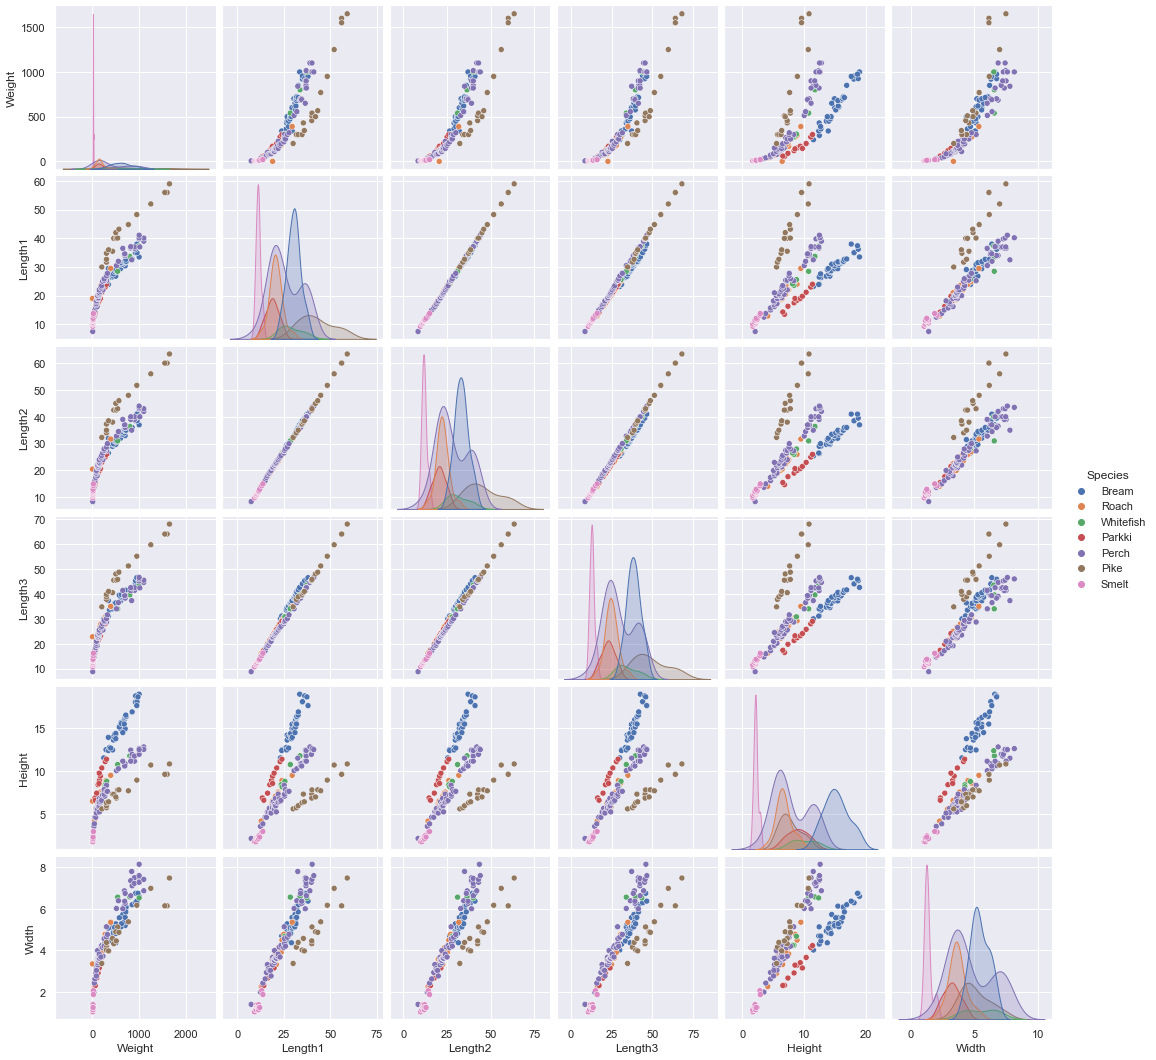

In [13]:
sns.pairplot(df, hue='Species')

<AxesSubplot:xlabel='Width', ylabel='Count'>

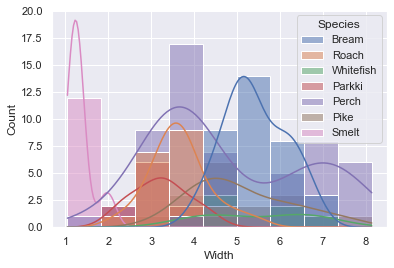

In [14]:
sns.histplot(data=df, x='Width', hue='Species', kde=True)

In [15]:
# Matriz de correlação
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<AxesSubplot:>

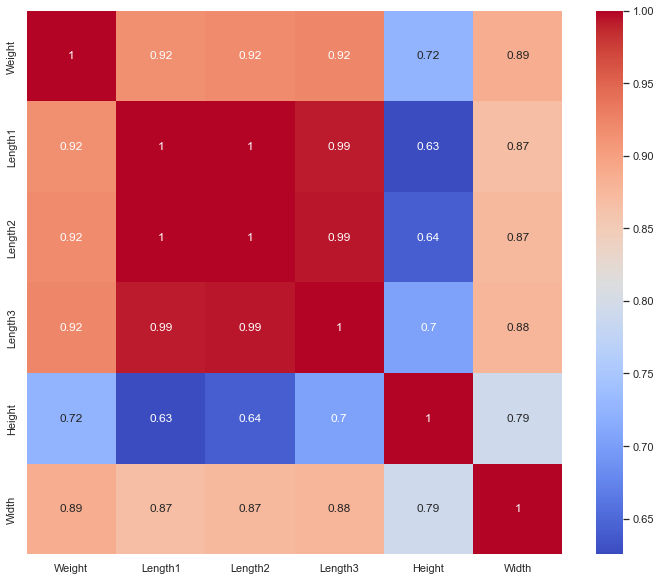

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## Definir a Regressão Linear Múltipla

In [17]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [18]:
y = df['Weight'] # Variável resposta
X = df.drop(['Weight', 'Species'], axis=1) # Variáveis explicativas

In [19]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [20]:
X.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


### Scikit Learning

#### Etapas de utilização de um modelo de ML

1. Preparar o X (variáveis explicativas) e o y (variável resposta)
2. Fitar o modelo (treinar): calcular os coefientes da Regressão Linear.
3. Predizer outros valores de X, utilizando o modelo treinado.

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X, y)

LinearRegression()

In [23]:
lr.intercept_ # intercepto (Beta 0)

-499.58695535694153

In [24]:
lr.coef_

array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
        22.47330665])

#### Regressão Linear Simples

$$
y = \beta_0 + \beta_1 \cdot x
$$

#### Regressão Linear Múltipla

$$
    y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5
$$

In [25]:
y[0]

242.0

In [26]:
X.loc[0] # A primeira linha do DF X

Length1    23.20
Length2    25.40
Length3    30.00
Height     11.52
Width       4.02
Name: 0, dtype: float64

In [27]:
lr.intercept_ + lr.coef_[0] * X.loc[0]['Length1'] + lr.coef_[1] * X.loc[0]['Length2'] + lr.coef_[2] * X.loc[0]['Length3'] + lr.coef_[3] * X.loc[0]['Height'] + lr.coef_[4] * X.loc[0]['Width']

326.8161277721263

#### Predição para todos os dados do Dataset

In [29]:
X.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [30]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [31]:
y_pred = lr.predict(X) # Valor predito/estimado do meu Y (Peso dos peixes)

In [33]:
X.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [36]:
y_pred

array([ 326.81612777,  369.57859339,  370.82418025,  439.05613854,
        444.16916821,  466.12531938,  496.15134252,  473.62398623,
        511.95189321,  540.44545602,  536.53040775,  551.80179482,
        540.3150434 ,  556.0586456 ,  584.39982147,  607.28049765,
        608.21493286,  602.63015994,  645.87687859,  629.752138  ,
        636.94759733,  671.89658763,  645.00106119,  651.90331312,
        670.71263903,  666.68027257,  688.73713396,  698.76730011,
        720.43978287,  796.13010587,  803.62924782,  807.54330665,
        867.35964459,  911.56438073,  894.45974647,  -89.13240595,
         34.59573548,   76.61669964,   91.9448575 ,  141.5233585 ,
        148.11845226,  135.97771966,  132.18181968,  160.54902275,
        197.22186967,  182.36104273,  197.43654712,  210.10228652,
        225.46574556,  221.7914616 ,  249.24362069,  286.00318882,
        331.92493631,  344.59908139,  505.82109937,  301.84880663,
        305.71765485,  373.5551134 ,  539.81247674,  695.31306

In [29]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [39]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.8852867046546207

In [40]:
lr.score(X, y)

0.8852867046546207

### Statsmodels

In [42]:
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [46]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           4.95e-70
Time:                        12:49:59   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -499.5870     29.572    -16.894      0.000    -558.010    -441.164
Length1       62.3552     40.209      1.551      0.123     -17.081     141.791
Length2       -6.5268     41.759     -0.156      0.876     -89.025      75.971
Length3      -29.0262     17.353     -1.673      0.096     -63.309       5.256
Height        28.2974      8.729      3.242      0.001      11.052      45.543
Width         22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análise do Erro da Regressão

In [47]:
model.resid

0      -84.816128
1      -79.578593
2      -30.824180
3      -76.056139
4      -14.169168
          ...    
154    172.808116
155    158.935439
156    150.043413
157    102.979758
158    101.905694
Length: 159, dtype: float64

In [48]:
y - y_pred # cálculo do resíduo

0      -84.816128
1      -79.578593
2      -30.824180
3      -76.056139
4      -14.169168
          ...    
154    172.808116
155    158.935439
156    150.043413
157    102.979758
158    101.905694
Name: Weight, Length: 159, dtype: float64

#### 1. A média do erro deve ser zero

In [49]:
model.resid.mean()

8.508637540171262e-14

#### 2. A distribuição dos erros deve seguir uma distribuição normal

<AxesSubplot:ylabel='Count'>

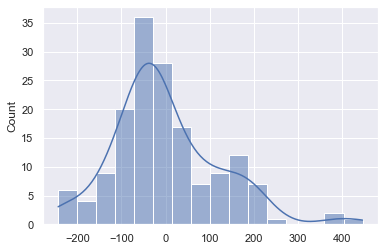

In [50]:
sns.histplot(model.resid, kde=True)

#### 3. Erro deve ser descorrelacionado

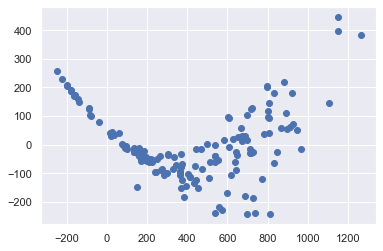

In [51]:
plt.scatter(y_pred, model.resid)

## Removendo Outliers

<AxesSubplot:>

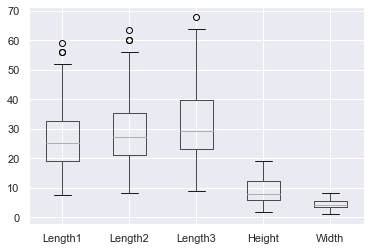

In [58]:
df.drop(['Species', 'Weight'], axis=1).boxplot()

<AxesSubplot:>

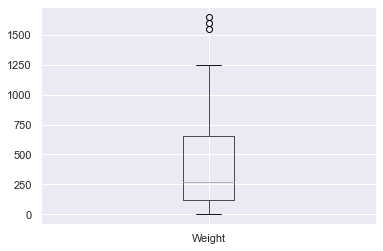

In [57]:
df[['Weight']].boxplot()

In [56]:
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

In [59]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [60]:
colunas = ['Weight', 'Length1', 'Length2', 'Length3']

In [61]:
for coluna in colunas:
    inf, sup = calc_min_and_max_range(df[coluna])
    
    df = df[(df[coluna] > inf) & (df[coluna] < sup)]

In [66]:
df
df.shape

(155, 7)

<AxesSubplot:>

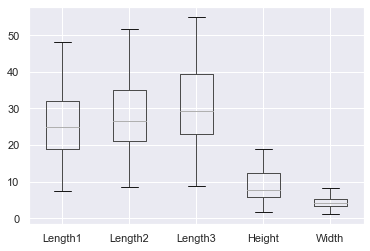

In [63]:
df.drop(['Species', 'Weight'], axis=1).boxplot()

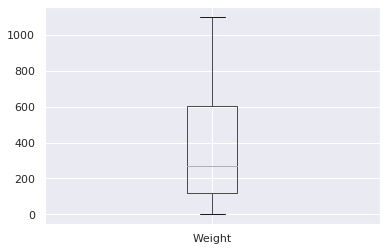

In [46]:
df[['Weight']].boxplot()

## Modelo de Regressão sem Outliers
---

In [67]:
X = df.drop(['Species', 'Weight'], axis=1)
y = df['Weight']

In [68]:
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [69]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 155, dtype: float64

### Sklearn

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(X, y)

LinearRegression()

In [72]:
lr.score(X, y)

0.9069290835432218

In [73]:
y_pred = lr.predict(X)

In [74]:
r2_score(y, y_pred)

0.9069290835432218

### Statsmodels

In [55]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     290.4
Date:                Wed, 12 May 2021   Prob (F-statistic):           6.45e-75
Time:                        19:22:22   Log-Likelihood:                -925.92
No. Observations:                 155   AIC:                             1864.
Df Residuals:                     149   BIC:                             1882.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -407.8029     25.200    -16.183      0.000    -457.598    -358.008
Length1      117.1278     32.241      3.633      0.000      53.419     180.837
Length2      -58.9144     33.359     -1.766      0.079    -124.832       7.003
Length3      -38.8324     13.769     -2.820      0.005     -66.041     -11.624
Height        39.4419      7.022      5.617      0.000      25.566      53.318
Width         56.3974     16.515      3.415      0.001      23.763      89.032
==============================================================================
Omnibus:                        9.828   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.392
Skew:                           0.609   Prob(JB):                      0.00554
Kurtosis:                       2.646   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Count'>

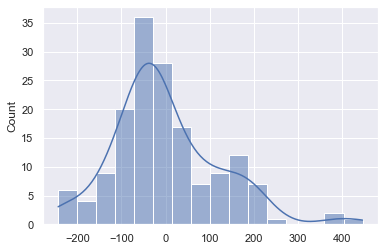

In [75]:
sns.histplot(model.resid, kde=True)

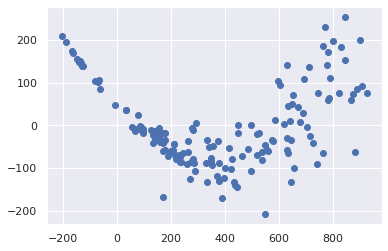

In [58]:
plt.scatter(y_pred, model.resid)

## Considerando os Dados Categóricos
---

In [76]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [80]:
pd.get_dummies(df, drop_first=True)

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


In [81]:
df['species'] = df['Species'].map({
    'Bream': 0,
    'Roach': 1,
    'Whitefish': 2,
    'Parkki': 3,
    'Perch': 4,
    'Pike': 5,
    'Smelt': 6
})

In [84]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,species
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [85]:
X = df.drop(['Species', 'Weight'], axis=1)

In [95]:
X.head()


,Length1,Length2,Length3,Height,Width,species
0,23.2,25.4,30.0,11.5200,4.0200,0
1,24.0,26.3,31.2,12.4800,4.3056,0
2,23.9,26.5,31.1,12.3778,4.6961,0
3,26.3,29.0,33.5,12.7300,4.4555,0
4,26.5,29.0,34.0,12.4440,5.1340,0


In [65]:
y = df['Weight']

## Avaliando o modelo com a presença dos Dados Categóricos

### Sklearn

In [96]:
lr = LinearRegression()

In [97]:
lr.fit(X, y)

LinearRegression()

In [98]:
lr.coef_

array([ 82.46690596, -96.25250448,  23.16478763,  36.16223965,
        91.38483721,  46.69845839])

In [69]:
lr.intercept_

-632.5641109755802

In [70]:
lr.score(X, y)

0.9241405510725724

In [71]:
y_pred = lr.predict(X)

In [72]:
r2_score(y, y_pred)

0.9241405510725724

### Statsmodels

In [99]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     300.5
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           3.22e-80
Time:                        13:17:15   Log-Likelihood:                -910.08
No. Observations:                 155   AIC:                             1834.
Df Residuals:                     148   BIC:                             1855.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -632.5641     45.006    -14.055      0.000    -721.501    -543.627
Length1       82.4669     29.812      2.766      0.006      23.555     141.379
Length2      -96.2525     30.898     -3.115      0.002    -157.310     -35.195
Length3       23.1648     16.433      1.410      0.161      -9.309      55.639
Height        36.1622      6.386      5.662      0.000      23.542      48.782
Width         91.3848     16.133      5.665      0.000      59.504     123.265
species       46.6985      8.059      5.795      0.000      30.773      62.624
==============================================================================
Omnibus:                        8.560   Durbin-Watson:                   0.693
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.485
Skew:                           0.561   Prob(JB):                       0.0144
Kurtosis:                       3.236   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Análise do Erro

<AxesSubplot:ylabel='Count'>

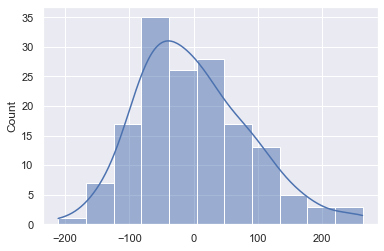

In [100]:
sns.histplot(model.resid, kde=True)

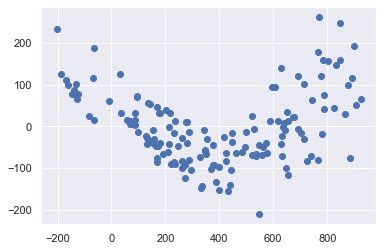

In [101]:
plt.scatter(y_pred, model.resid)

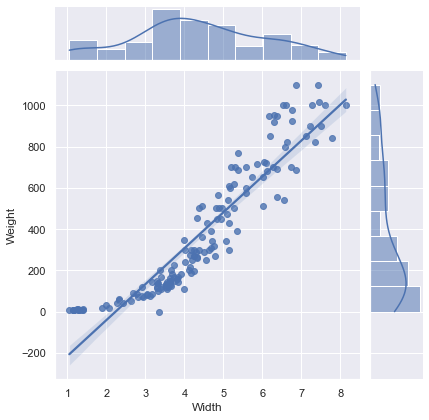

In [102]:
sns.jointplot(data=df, x='Width', y='Weight', kind='reg')

### Remoção de Variáveis Desnecessárias
---

<AxesSubplot:>

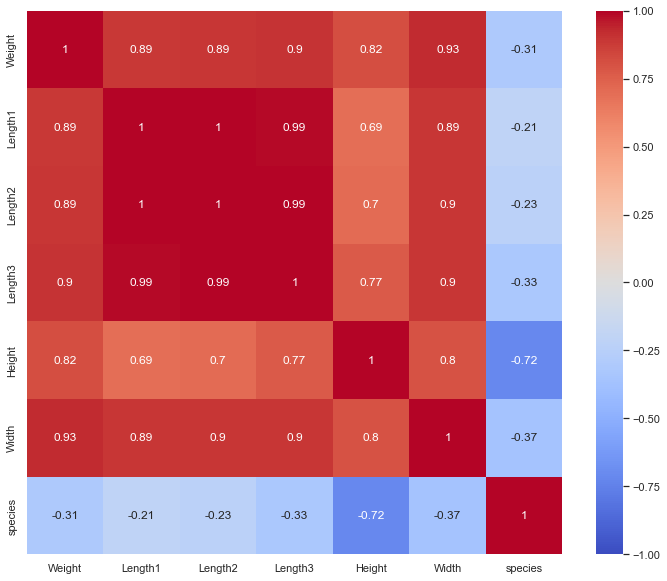

In [104]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [105]:
df_minimal = df.drop(['Length2', 'Length3'], axis=1)

In [106]:
df_minimal.head()

,Species,Weight,Length1,Height,Width,species
0,Bream,242.0,23.2,11.5200,4.0200,0
1,Bream,290.0,24.0,12.4800,4.3056,0
2,Bream,340.0,23.9,12.3778,4.6961,0
3,Bream,363.0,26.3,12.7300,4.4555,0
4,Bream,430.0,26.5,12.4440,5.1340,0


<AxesSubplot:>

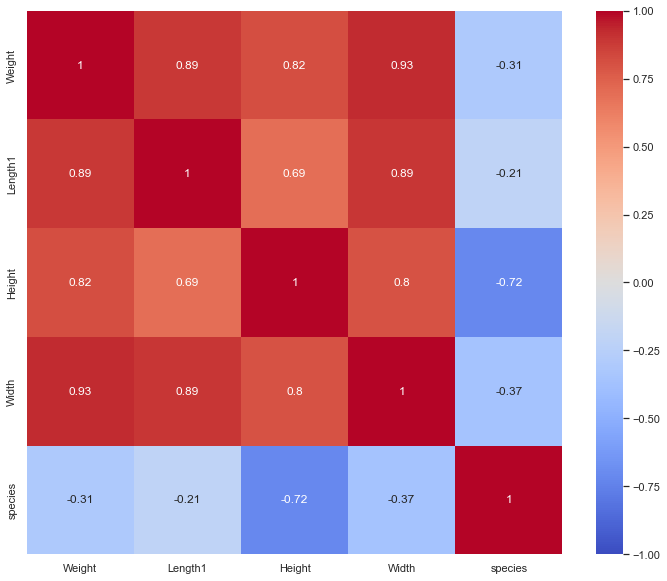

In [107]:
plt.figure(figsize=(12,10))
sns.heatmap(df_minimal.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [112]:
X = df_minimal.drop(['Weight', 'Species'], axis=1)
y = df_minimal['Weight']


### Sklearn

In [113]:
df_minimal.head()

,Species,Weight,Length1,Height,Width,species
0,Bream,242.0,23.2,11.5200,4.0200,0
1,Bream,290.0,24.0,12.4800,4.3056,0
2,Bream,340.0,23.9,12.3778,4.6961,0
3,Bream,363.0,26.3,12.7300,4.4555,0
4,Bream,430.0,26.5,12.4440,5.1340,0


In [114]:
lr = LinearRegression()

In [115]:
lr.fit(X, y)

LinearRegression()

In [116]:
lr.coef_

array([ 8.38798067, 38.62601654, 71.33662497, 40.94951776])

In [117]:
lr.intercept_

-616.1785382243604

In [118]:
lr.score(X, y)

0.9191610055608289

### Statsmodels

In [107]:
X.head()

,Length1,Height,Width,species
0,23.2,11.5200,4.0200,0
1,24.0,12.4800,4.3056,0
2,23.9,12.3778,4.6961,0
3,26.3,12.7300,4.4555,0
4,26.5,12.4440,5.1340,0


In [106]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     426.4
Date:                Wed, 12 May 2021   Prob (F-statistic):           8.25e-81
Time:                        19:38:04   Log-Likelihood:                -915.00
No. Observations:                 155   AIC:                             1840.
Df Residuals:                     150   BIC:                             1855.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -616.1785     34.377    -17.924      0.000    -684.104    -548.253
Length1        8.3880      1.901      4.413      0.000       4.632      12.144
Height        38.6260      4.395      8.788      0.000      29.941      47.311
Width         71.3366     11.873      6.008      0.000      47.877      94.796
species       40.9495      6.243      6.560      0.000      28.615      53.284
==============================================================================
Omnibus:                        7.998   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.391
Skew:                           0.566   Prob(JB):                       0.0151
Kurtosis:                       2.875   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
model.resid

0      -68.167556
1      -84.332657
2      -57.403232
3      -50.974877
4      -23.007332
          ...    
154    106.061108
155    101.354660
156    103.650892
157     21.028195
158     27.312307
Length: 155, dtype: float64

In [108]:
y_est = lr.predict(X)

In [109]:
y_est

array([ 310.16755632,  374.33265682,  397.40323192,  413.97487659,
        453.00733204,  485.52995708,  532.86732025,  439.29012903,
        501.82357143,  526.18265575,  537.07166278,  523.12375578,
        470.97316402,  530.54322831,  576.92441571,  624.79490425,
        589.85672805,  586.5836176 ,  613.07854642,  611.50175402,
        628.02828085,  648.07932379,  624.28743343,  685.38595968,
        677.40426383,  714.29573605,  718.66804681,  713.520606  ,
        753.49813303,  868.08794455,  823.96454112,  824.76371276,
        893.3672191 ,  898.67281725,  837.74029923, -145.04278855,
        -30.88456124,   -5.88604729,   20.84436192,   75.85810384,
         73.34562688,   65.45287002,   58.68468898,   87.91672307,
        106.05379254,  140.92411645,   91.11326004,  120.04305249,
        173.92063746,  135.45459912,  190.27479014,  175.09530938,
        289.74447449,  305.95071904,  420.591803  ,  290.38775843,
        285.56883784,  353.48151919,  587.88680125,  671.62218

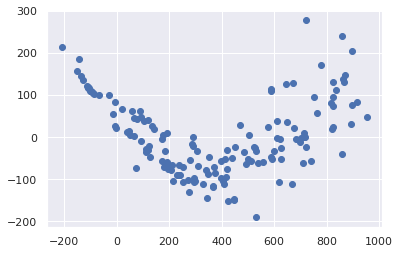

In [110]:
plt.scatter(y_est, model.resid)

## Transformação de Variáveis
---

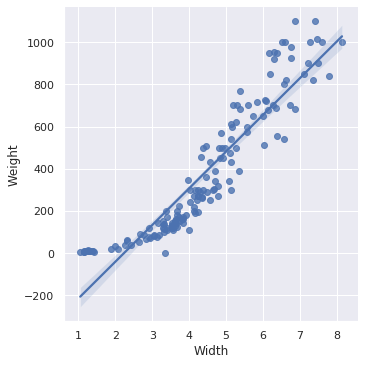

In [112]:
sns.lmplot(data=df_minimal, x='Width', y='Weight')

### Transformação log & Transformação log-log (duplo)

In [121]:
df_minimal.shape

(155, 6)

In [122]:
df_minimal = df_minimal[df_minimal['Weight'] != 0]

In [123]:
df_minimal.shape

(154, 6)

In [114]:
df_minimal['Width']

0      4.0200
1      4.3056
2      4.6961
3      4.4555
4      5.1340
        ...  
154    1.3936
155    1.2690
156    1.2558
157    2.0672
158    1.8792
Name: Width, Length: 155, dtype: float64

In [113]:
np.log(df_minimal['Width'])

0      1.391282
1      1.459917
2      1.546732
3      1.494139
4      1.635885
         ...   
154    0.331890
155    0.238229
156    0.227773
157    0.726195
158    0.630846
Name: Width, Length: 155, dtype: float64

In [125]:
np.log(df_minimal['Weight'])

0      5.488938
1      5.669881
2      5.828946
3      5.894403
4      6.063785
         ...   
154    2.501436
155    2.595255
156    2.501436
157    2.980619
158    2.990720
Name: Weight, Length: 154, dtype: float64

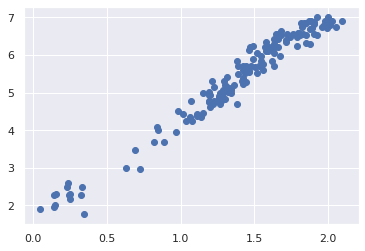

In [124]:
plt.scatter(np.log(df_minimal['Width']), np.log(df_minimal['Weight']))

In [128]:
-np.inf

-inf

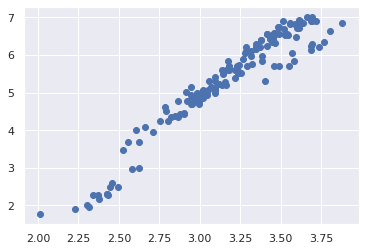

In [126]:
plt.scatter(np.log(df_minimal['Length1']), np.log(df_minimal['Weight']))

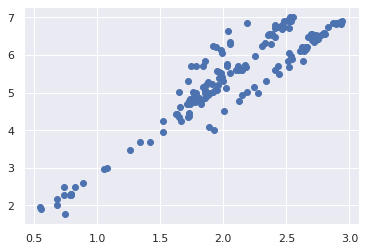

In [129]:
plt.scatter(np.log(df_minimal['Height']), np.log(df_minimal['Weight']))

In [130]:
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
154    6
155    6
156    6
157    6
158    6
Name: species, Length: 155, dtype: int64

In [131]:
df_log = df_minimal.copy()

In [132]:
df_log['Weight'] = np.log(df_log['Weight'])
df_log['Width'] = np.log(df_log['Width'])
df_log['Height'] = np.log(df_log['Height'])
df_log['Length1'] = np.log(df_log['Length1'])

In [133]:
df_log.head()

,Species,Weight,Length1,Height,Width,species
0,Bream,5.488938,3.144152,2.444085,1.391282,0
1,Bream,5.669881,3.178054,2.524127,1.459917,0
2,Bream,5.828946,3.173878,2.515905,1.546732,0
3,Bream,5.894403,3.269569,2.543961,1.494139,0
4,Bream,6.063785,3.277145,2.521239,1.635885,0


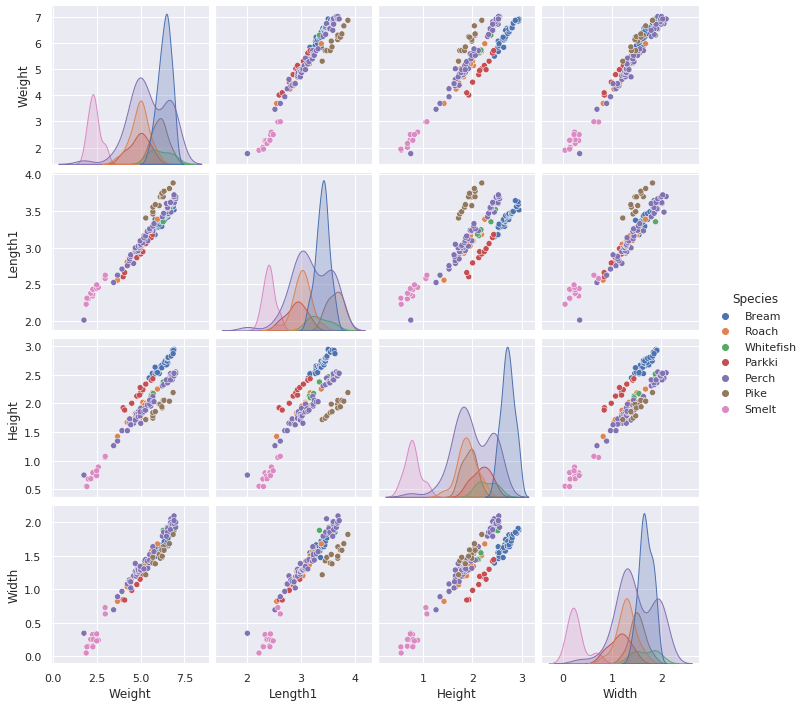

In [136]:
sns.pairplot(df_log.drop(['species'], axis=1), hue='Species')

In [139]:
X = df_log.drop(['Species', 'Weight'], axis=1)
y = df_log['Weight']

In [142]:
X.head()

,Length1,Height,Width,species
0,3.144152,2.444085,1.391282,0
1,3.178054,2.524127,1.459917,0
2,3.173878,2.515905,1.546732,0
3,3.269569,2.543961,1.494139,0
4,3.277145,2.521239,1.635885,0


### Sklearn

In [141]:
lr = LinearRegression().fit(X, y)

In [143]:
lr.coef_

array([1.35293214, 0.65645409, 0.98258257, 0.00422266])

In [144]:
lr.score(X, y)

0.994751565225584

### Statsmodels

In [145]:
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()

In [146]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7060.
Date:                Wed, 12 May 2021   Prob (F-statistic):          1.04e-168
Time:                        20:34:28   Log-Likelihood:                 145.05
No. Observations:                 154   AIC:                            -280.1
Df Residuals:                     149   BIC:                            -264.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6468      0.123    -13.388      0.000      -1.890      -1.404
Length1        1.3529      0.060     22.477      0.000       1.234       1.472
Height         0.6565      0.050     13.150      0.000       0.558       0.755
Width          0.9826      0.062     15.838      0.000       0.860       1.105
species        0.0042      0.007      0.591      0.555      -0.010       0.018
==============================================================================
Omnibus:                       25.328   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.379
Skew:                          -0.688   Prob(JB):                     3.47e-13
Kurtosis:                       5.655   Cond. No.                         95.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Removendo as espécies

### Sklearn

### Statsmodels

## Na prática
---

1. Processo de treinamento do nosso modelo
2. Processo de teste do nosso modelo (validação)

#### Divisão treino-teste

- 70% dos dados para treino
- 30% dos dados para teste

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X.head()

,Length1,Height,Width,species
0,3.144152,2.444085,1.391282,0
1,3.178054,2.524127,1.459917,0
2,3.173878,2.515905,1.546732,0
3,3.269569,2.543961,1.494139,0
4,3.277145,2.521239,1.635885,0


In [150]:
y.head()

0    5.488938
1    5.669881
2    5.828946
3    5.894403
4    6.063785
Name: Weight, dtype: float64

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [153]:
X_train

,Length1,Height,Width,species
65,2.912351,2.185242,1.191738,3
99,3.135494,1.862451,1.303863,4
51,3.161247,1.958206,1.362514,1
21,3.446808,2.772189,1.680902,0
22,3.449988,2.742303,1.663945,0
...,...,...,...,...
64,2.862201,2.127303,1.070933,3
71,3.178054,2.430802,1.443147,3
82,2.944439,1.739150,1.268355,4
11,3.356897,2.665240,1.571653,0


In [156]:
X_test.shape

(47, 4)

In [157]:
y_train

65    5.010635
99    5.192957
51    5.192957
21    6.529419
22    6.429719
        ...   
64    4.787492
71    5.703782
82    4.700480
11    6.214608
96    5.416100
Name: Weight, Length: 107, dtype: float64

In [159]:
y_test.shape

(47,)

In [160]:
lr = LinearRegression().fit(X_train, y_train)

In [161]:
lr.score(X_train, y_train)

0.9952021736203663

In [164]:
y_pred = lr.predict(X_test)

In [163]:
y_test

81     4.442651
107    5.703782
117    6.476972
130    5.703782
32     6.829794
78     4.356709
39     4.787492
92     5.010635
139    6.646391
135    6.234411
42     4.787492
62     4.094345
16     6.551080
97     4.976734
66     4.941642
33     6.882437
4      6.063785
1      5.669881
79     4.382027
85     4.867534
140    6.856462
102    5.703782
109    6.242223
54     5.966147
101    5.384495
31     6.861711
95     5.135798
49     5.081404
119    6.745236
93     4.976734
124    6.907755
43     5.010635
70     5.609472
69     5.298317
56     5.598422
98     5.236442
134    6.122493
25     6.586172
67     5.135798
145    1.902108
75     3.941582
86     4.787492
87     4.787492
113    6.551080
128    5.298317
90     4.700480
44     4.976734
Name: Weight, dtype: float64

In [165]:
np.exp(y_pred)

array([  78.1343844 ,  288.14783254,  722.30252206,  297.62647471,
       1112.95920841,   81.1428284 ,  117.01444537,  146.38062859,
        654.67370296,  430.4835345 ,  112.15438134,   56.2929047 ,
        589.69124141,  162.25742895,  139.411906  , 1154.71669054,
        425.71211499,  313.07661826,   86.17408435,  126.60546482,
        921.30580019,  314.34227501,  536.54014054,  427.46001974,
        224.77450991,  966.82953868,  151.65152768,  158.3938401 ,
        914.74903269,  135.71999216, 1032.70877381,  132.22371138,
        269.70437156,  204.01607314,  236.13539951,  190.46667443,
        435.49209381,  767.76995838,  154.2593666 ,    5.91819643,
         54.0103139 ,  123.79930529,  121.44585523,  720.31730078,
        194.49905152,  136.37081301,  137.37494339])